# Boom Bikes Linear Regression 

### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

So basically, the company wants to evaluate :
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

# 1. Reading and Understanding the Data

In [1]:
#Supress any Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the csv
data = pd.read_csv("day.csv")

In [4]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### As we can see from the describe that all continuous variable's mean and median difference is not significant that means there is no outliners in this model for continuous variables

In [7]:
#Checking if any value present which can be defined by holiday but not with working day
print(data[(data["holiday"]==1) & (data["workingday"]==1)])

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [8]:
from datetime import datetime

def parsing_date(text):
    for fmt in ('%d-%m-%Y', '%d/%m/%Y'):
        try:
            date = datetime.strptime(text, fmt)
            return date.day
        except ValueError:
            pass
    raise ValueError('no valid date format found')

In [9]:
data['day']=list(map(parsing_date,data['dteday']))
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


In [10]:
# Removing all unncessary fields
data.drop(['instant','holiday','dteday','casual','registered'],axis=1,inplace=True)

In [11]:
data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


# 2. Visualising the Data

#### Visualising all numeric variables

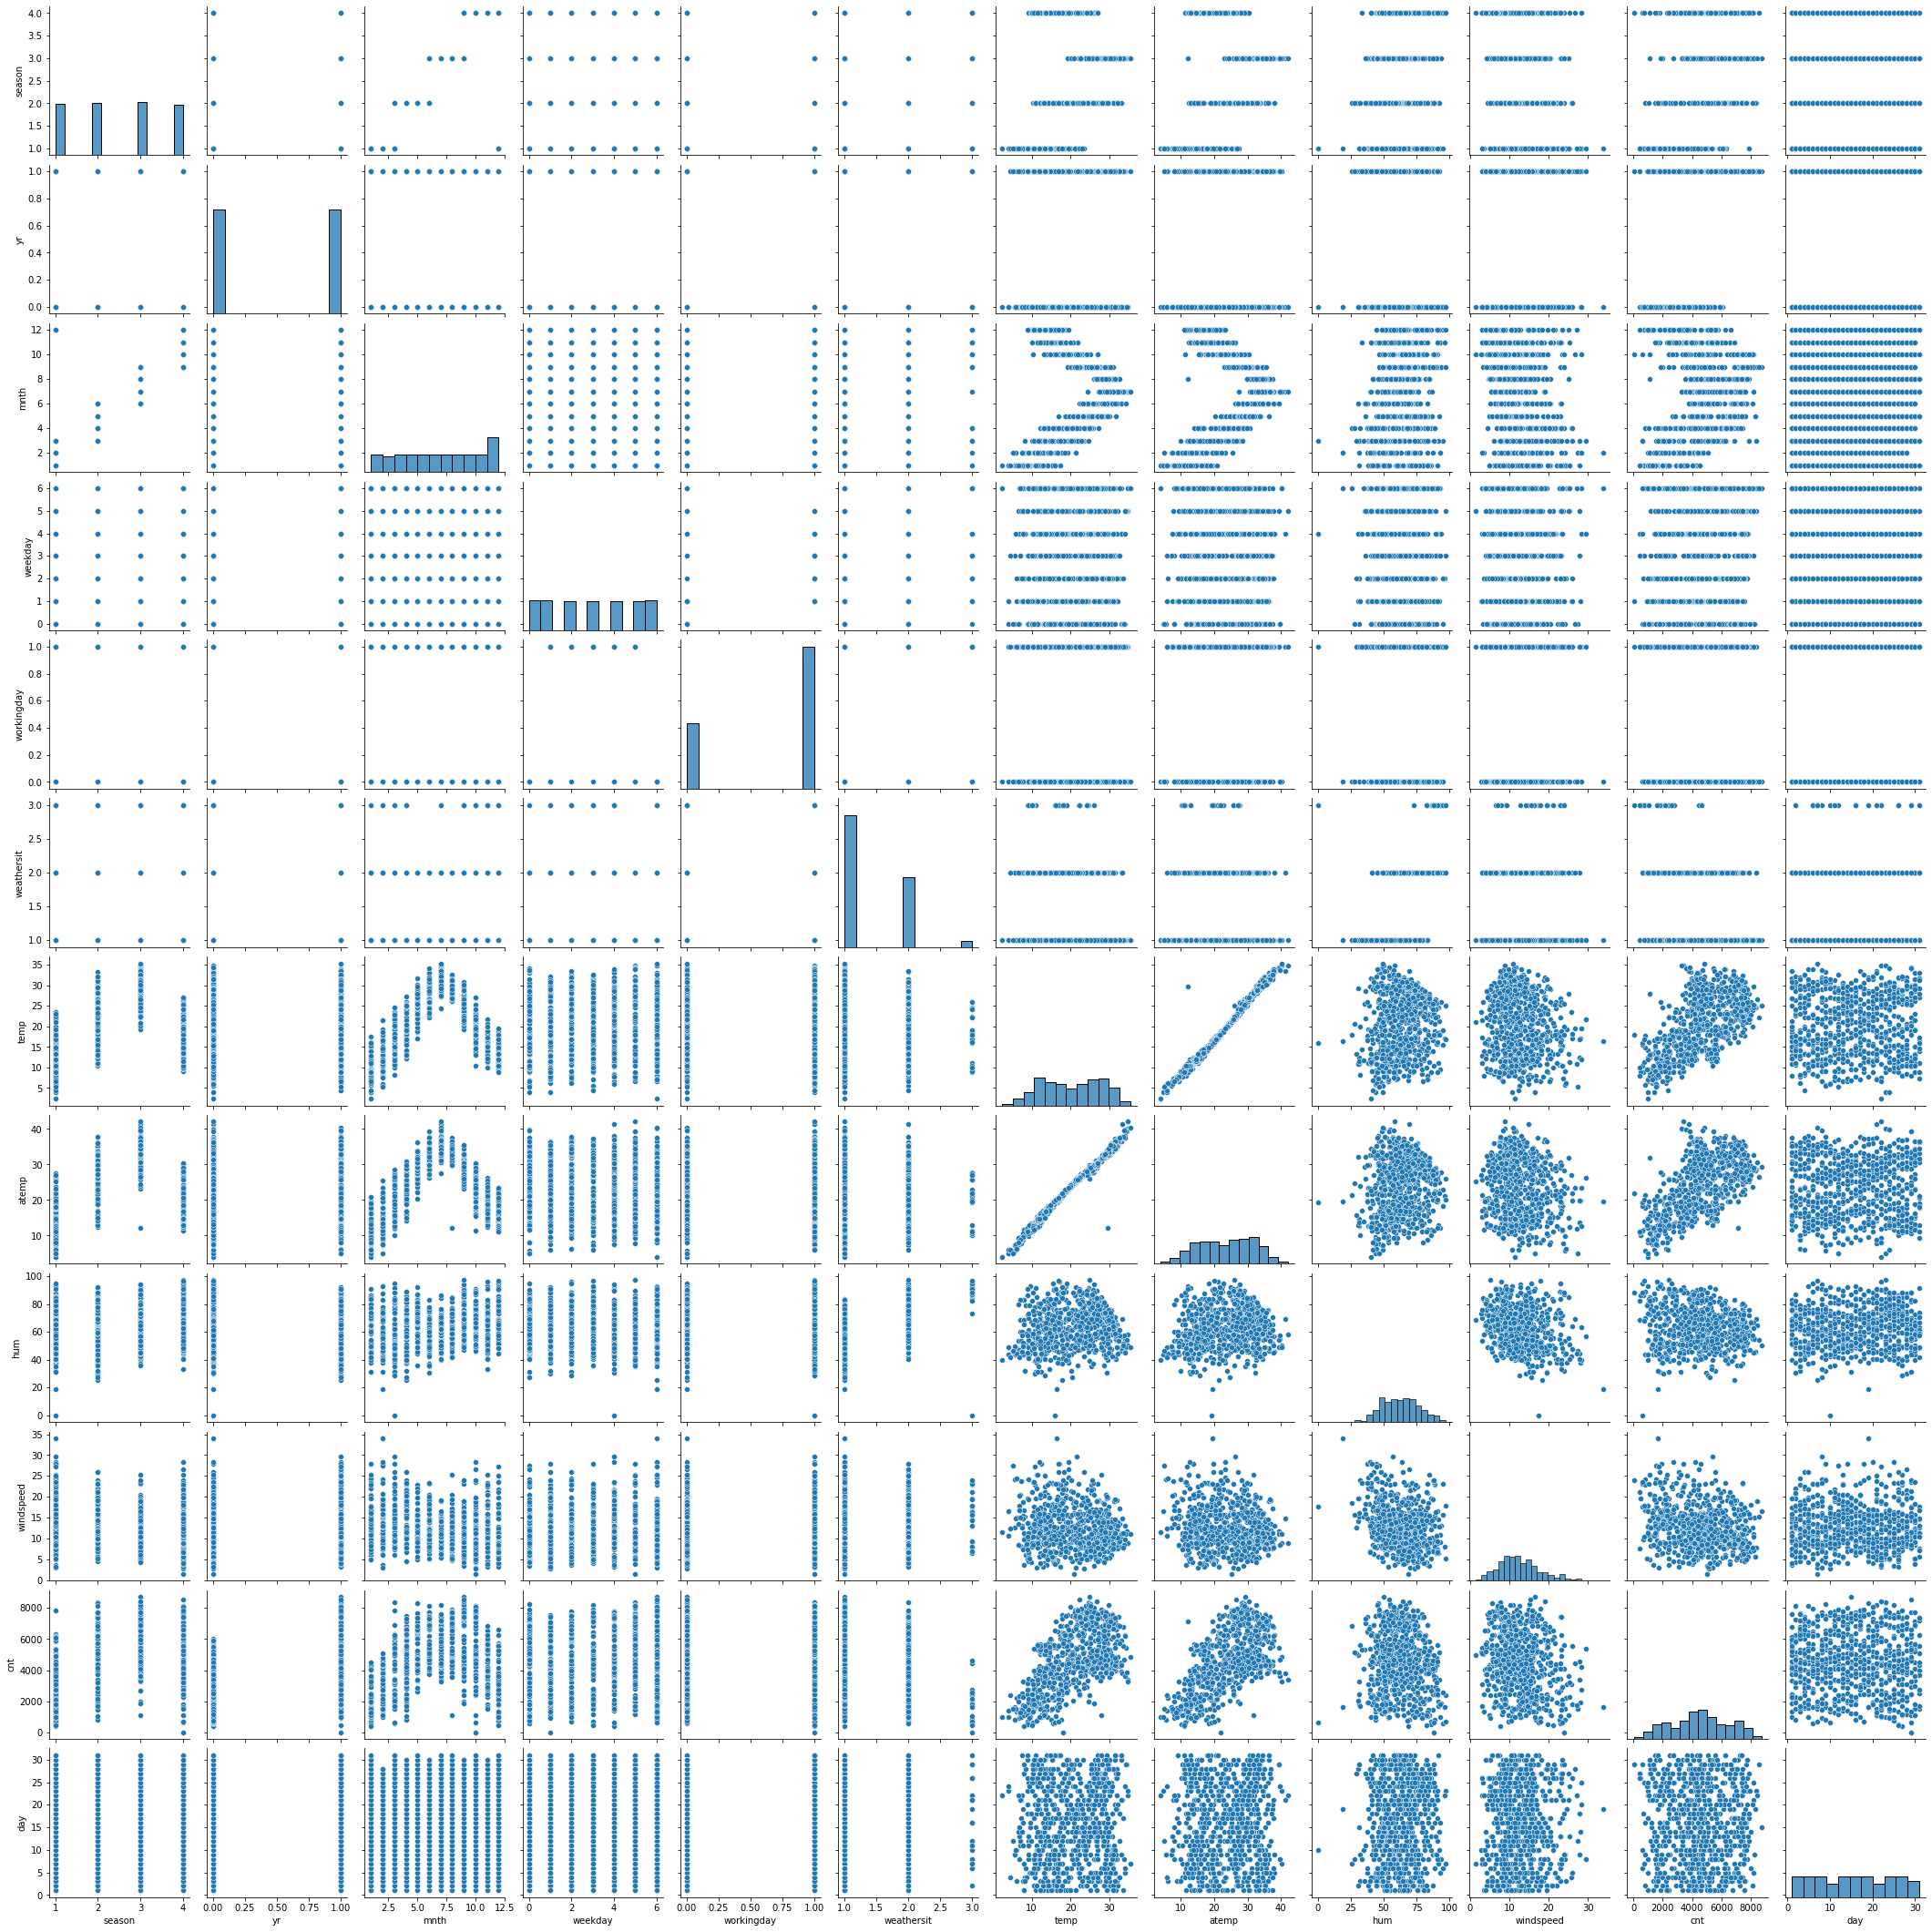

In [12]:
sns.pairplot(data)
plt.show()

in case of continuous variables temp and atemp having some linear relation but humidity and windspeed is not looking like anything so lets try to extract some other information using these variables like heat index and wind chill which may be more relevant

In [13]:
tmp_data=data[['cnt']]
# Formula for Wind Chill referred from wiki page for environment Canada (temp is in °C and assuming wind speed in kmph at 10m height)
tmp_data['wind_chill']=13.12+0.6215*data['temp']-11.37*data['windspeed']**0.16+0.3965*data['temp']*data['windspeed']**0.16
# Formula for Heat Index referred from wiki page for environment Canada (temp is in °C and assuming wind speed in kmph at 10m height)
tmp_data['heat_index'] = -8.78469475556 + 1.61139411*data['temp'] + 2.33854883889*data['hum'] -0.14611605*data['temp']*data['hum'] -0.012308094*data['temp']**2 -0.0164248277778*data['hum']**2 +0.002211732*data['hum']*data['temp']**2 + 0.00072546*data['temp']*data['hum']**2 -0.000003582*(data['temp']**2)*data['hum']**2

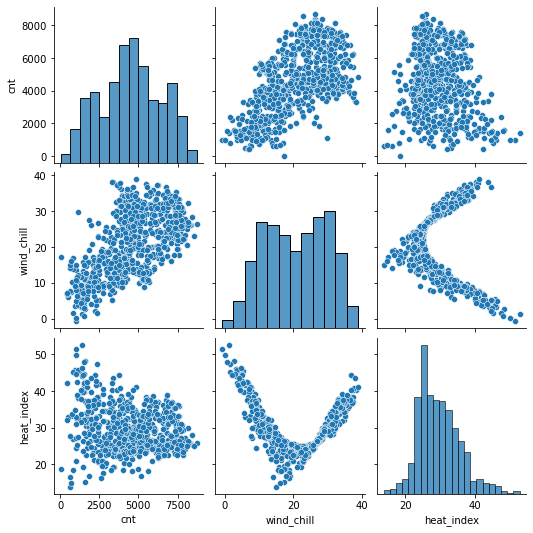

In [14]:
sns.pairplot(tmp_data)
plt.show()

heatindex is not looking like having much linear relation with cnt and windchill is much similar as temp (which is used to derive these variables) so instead of using these variable it seems to be a good option to use temp or atemp only

#### Visualising all categorical variables

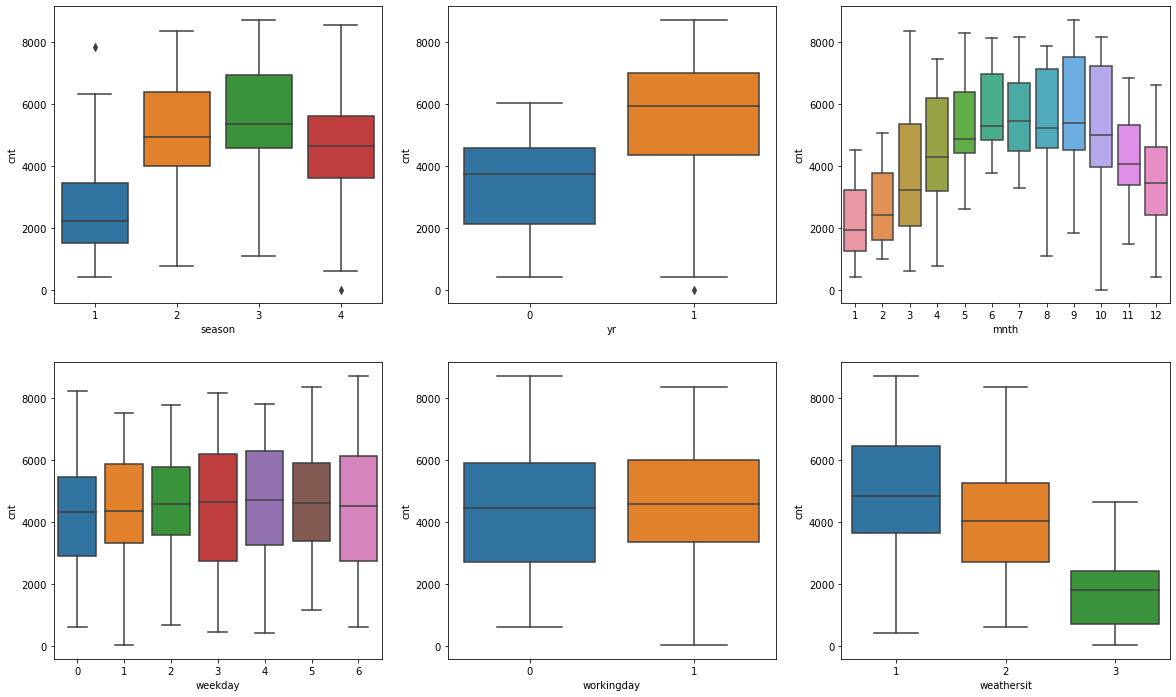

In [15]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=data)
plt.show()

#### Month(mnth) and Year(yr) seems related to check these using hue

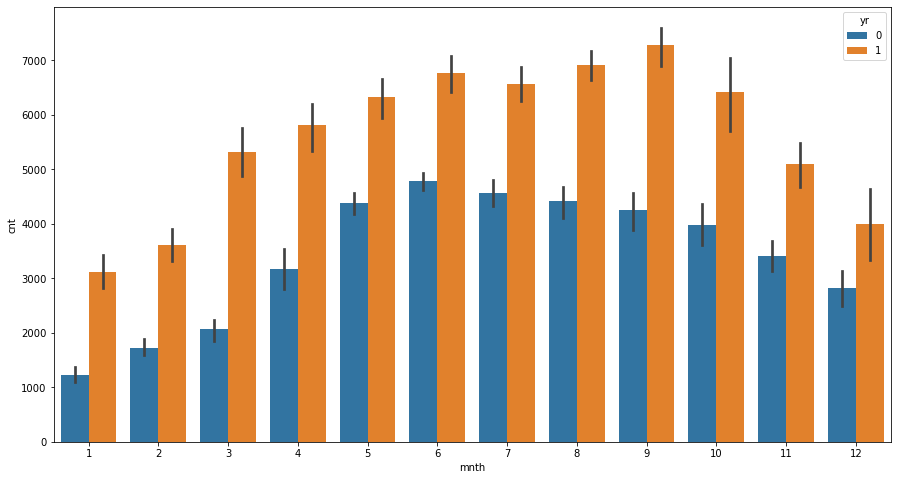

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(x='mnth',y='cnt',hue='yr',data=data)
plt.show()

#### Try to visualize it together to see if there is any pattern

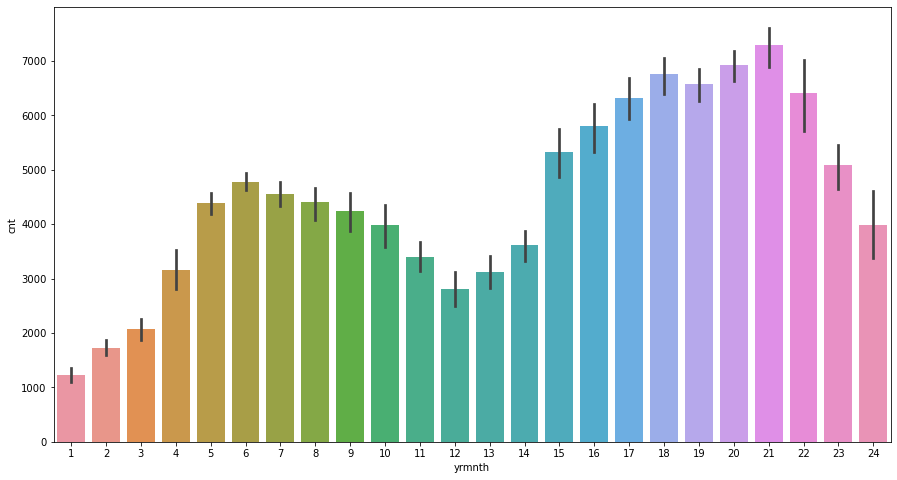

In [17]:
data['yrmnth']=data['yr']*12+data['mnth']
plt.figure(figsize=(15,8))
sns.barplot(x='yrmnth',y='cnt',data=data)
plt.show()

#### Found no specific pattern here so drop the column as the same pattern can be defined with months and year alone

In [18]:
data.drop(['yrmnth','day'],axis=1,inplace=True)

# 3. Data Preparation

##### Assign string values to categorical columns to make sense out of them

In [19]:
def weather_map(x):
    switcher={1:'clear',2:'mist',3:'light_rain',4:'heavy_rain'}
    return switcher.get(x)

data['weathersit']=data['weathersit'].apply(weather_map)

def season_map(x):
    switcher={1:'spring',2:'summer',3:'fall',4:'winter'}
    return switcher.get(x)

data['season']=data['season'].apply(season_map)

def month_map(x):
    switcher={1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'}
    return switcher.get(x)

data['mnth']=data['mnth'].apply(month_map)

def weekday_map(x):
    switcher={0:'su',1:'mo',2:'tu',3:'wed',4:'th',5:'fr',6:'sa'}
    return switcher.get(x)

data['weekday']=data['weekday'].apply(weekday_map)

### Create Dummy Variables

In [20]:
season=pd.get_dummies(data['season'],drop_first=True)
mnth=pd.get_dummies(data['mnth'],drop_first=True)
weekday=pd.get_dummies(data['weekday'],drop_first=True)
weathersit=pd.get_dummies(data['weathersit'],drop_first=True)

print(season.head())
print(mnth.head())
print(weekday.head())
print(weathersit.head())

   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0
   aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sept
0    0    0    0    1    0    0    0    0    0    0     0
1    0    0    0    1    0    0    0    0    0    0     0
2    0    0    0    1    0    0    0    0    0    0     0
3    0    0    0    1    0    0    0    0    0    0     0
4    0    0    0    1    0    0    0    0    0    0     0
   mo  sa  su  th  tu  wed
0   0   1   0   0   0    0
1   0   0   1   0   0    0
2   1   0   0   0   0    0
3   0   0   0   0   1    0
4   0   0   0   0   0    1
   light_rain  mist
0           0     1
1           0     1
2           0     0
3           0     0
4           0     0


In [21]:
data=pd.concat([data,season,mnth,weekday,weathersit],axis=1)
data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,oct,sept,mo,sa,su,th,tu,wed,light_rain,mist
0,spring,0,jan,sa,0,mist,14.110847,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,su,0,mist,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,mo,1,clear,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,tu,1,clear,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,wed,1,clear,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [22]:
data.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [23]:
data.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mo,sa,su,th,tu,wed,light_rain,mist
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# 4. Splitting the Data into Training and Testing Sets

In [24]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
train_data, test_data = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling the Features

In [25]:
#using min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
#Apply scaler to all continuous variables
cont_vars = ['temp','atemp','hum','windspeed','cnt']
train_data[cont_vars]=scaler.fit_transform(train_data[cont_vars])

train_data.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mo,sa,su,th,tu,wed,light_rain,mist
653,1,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [27]:
train_data.describe()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mo,sa,su,th,tu,wed,light_rain,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


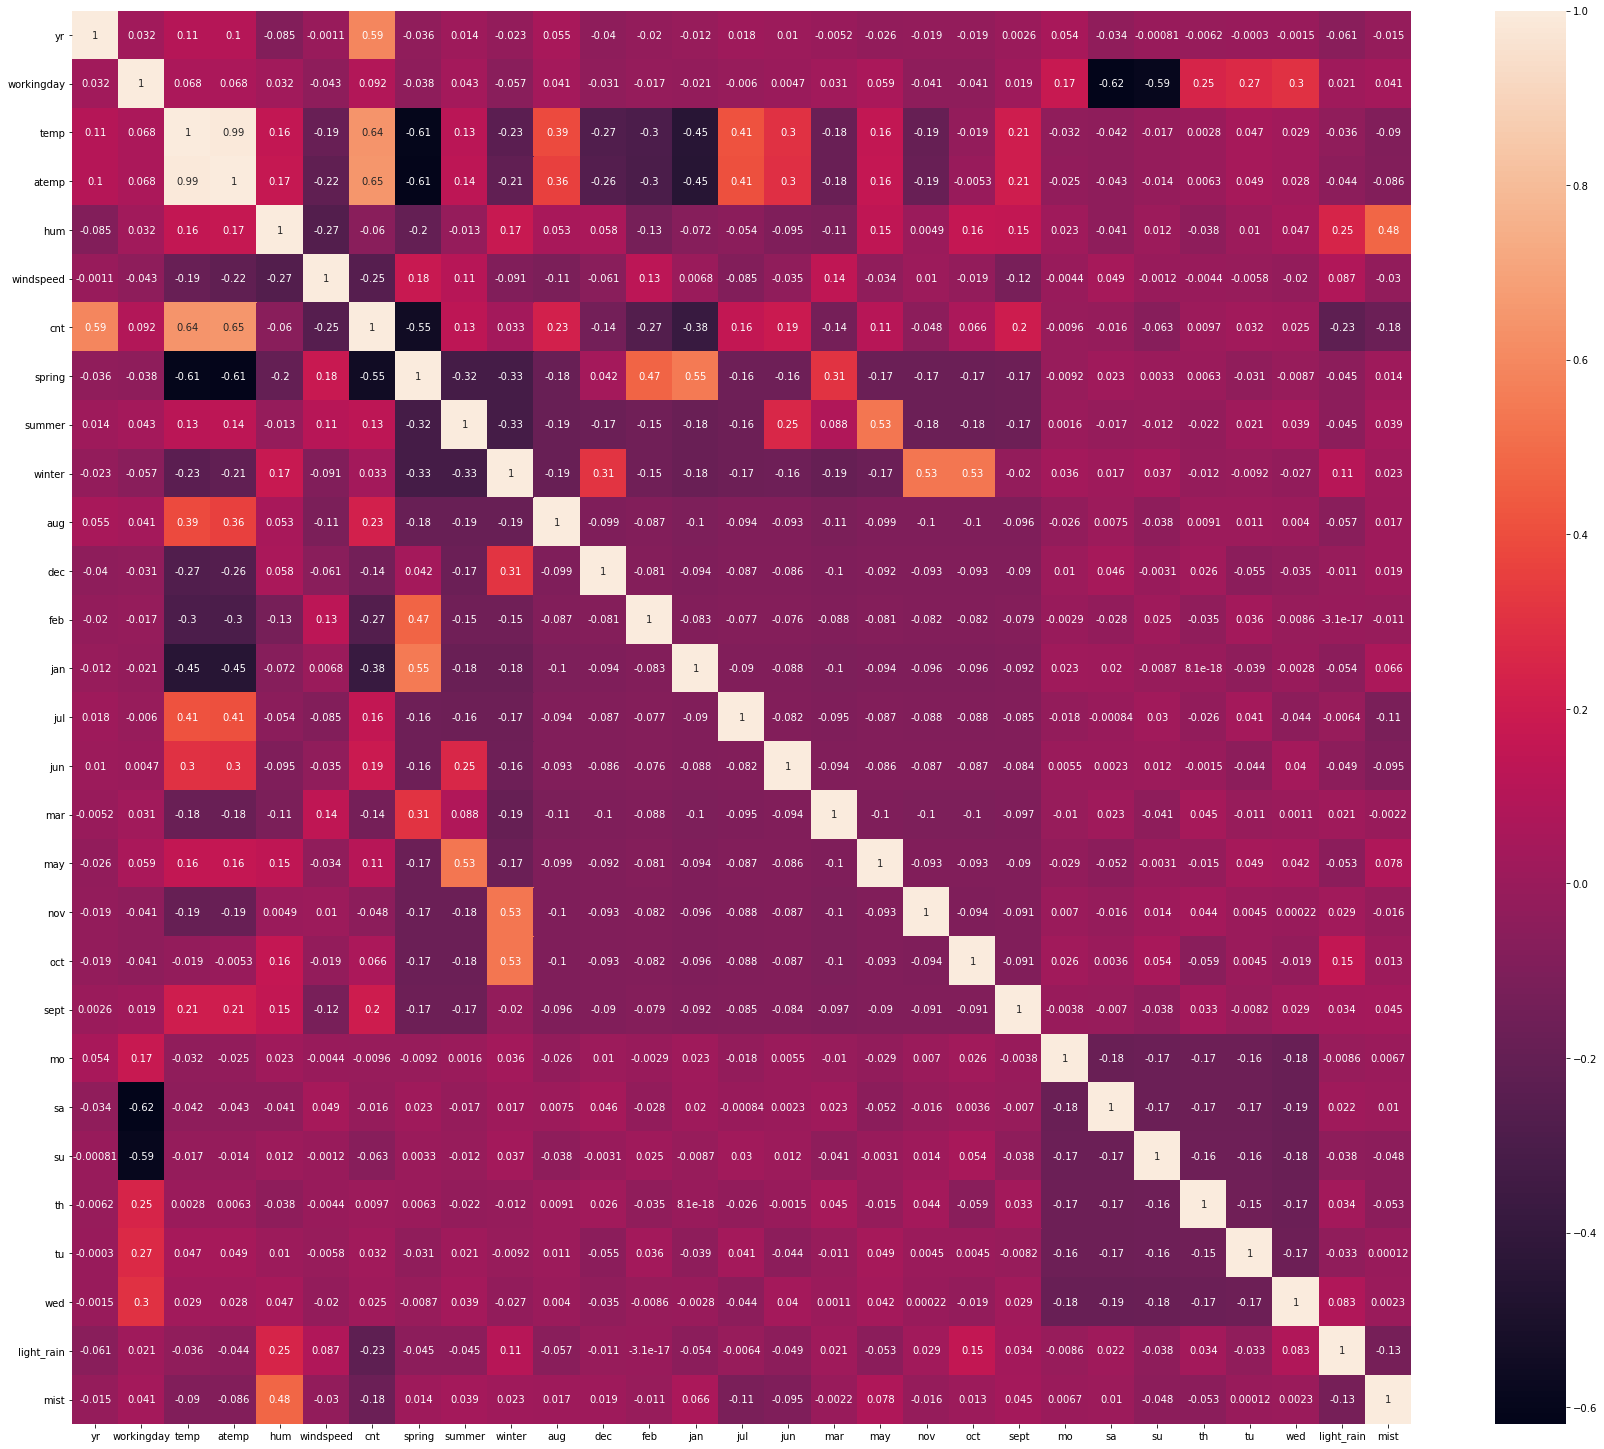

In [28]:
# Checking correlation coefficients
plt.figure(figsize=(30,26))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

#### atemp and temp are highly correlated so we need to remove one of them and atemp seems slightly more significant with cnt so we will procees with atemp but let's keep temp as for now and decide after checking the significance of the variables

#### Let's pick atemp as the first variable and try to fit the regression line to that

### Dividing into X and Y sets for the model building

In [29]:
y_train = train_data.pop('cnt')
X_train = train_data

# 5. Building a linear model

In [30]:
import statsmodels.api as sm

# Add a constant first
X_train_sm = sm.add_constant(X_train[['atemp']])
#Create a first fitted model
tsm=sm.OLS(y_train,X_train_sm).fit()
#Check params
tsm.params

const    0.162924
atemp    0.683633
dtype: float64

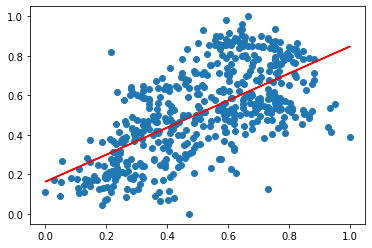

In [31]:
# Let's visualise the data
plt.scatter(X_train_sm.iloc[:,1],y_train)
plt.plot(X_train_sm.iloc[:,1],0.163+0.684*X_train_sm.iloc[:,1],'r')
plt.show()

In [32]:
# Print the summary
tsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           1.10e-61
Time:                        20:52:45   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.000       0.124       0.202
atemp          0.6836      0.036     19.098      0.000       0.613       0.754
==============================================================================
Omnibus:                        3.316   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.842
Skew:                           0.090   Prob(JB):                        0.241
Kurtosis:                       2.682   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Let's add new variable. As we can see that Yr and Spring is also highly related to cnt so let's add spring in the model

In [33]:
import statsmodels.api as sm

# Add a constant first
X_train_sm = sm.add_constant(X_train[['atemp','spring']])
#Create a first fitted model
tsm=sm.OLS(y_train,X_train_sm).fit()
#Check params
tsm.params

const     0.275565
atemp     0.524960
spring   -0.128502
dtype: float64

In [34]:
# Print the summary
tsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           1.05e-67
Time:                        20:52:46   Log-Likelihood:                 193.65
No. Observations:                 510   AIC:                            -381.3
Df Residuals:                     507   BIC:                            -368.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2756      0.027     10.201      0.000       0.222       0.329
atemp          0.5250      0.044     11.998      0.000       0.439       0.611
spring        -0.1285      0.022     -5.938      0.000      -0.171      -0.086
==============================================================================
Omnibus:                        2.023   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.364   Jarque-Bera (JB):                1.770
Skew:                          -0.001   Prob(JB):                        0.413
Kurtosis:                       2.711   Cond. No.                         8.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both the added variables seems significant and adjusted R2 also improved.Let's go ahead with adding all the variables

### Adding all variables

In [35]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
tsm=sm.OLS(y_train,X_train_sm).fit()
tsm.params

const         0.255925
yr            0.232208
workingday    0.086273
temp          0.401322
atemp         0.050628
hum          -0.151812
windspeed    -0.184388
spring       -0.048580
summer        0.038216
winter        0.105387
aug           0.016076
dec          -0.045572
feb          -0.032176
jan          -0.062565
jul          -0.039277
jun          -0.001704
mar           0.001288
may           0.024691
nov          -0.041783
oct           0.007695
sept          0.081806
mo           -0.021502
sa            0.085371
su            0.030838
th           -0.009750
tu           -0.019308
wed          -0.005733
light_rain   -0.256697
mist         -0.061030
dtype: float64

In [36]:
tsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          8.42e-181
Time:                        20:52:46   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2559      0.052      4.911      0.000       0.154       0.358
yr             0.2322      0.008     28.792      0.000       0.216       0.248
workingday     0.0863      0.027      3.234      0.001       0.034       0.139
temp           0.4013      0.142      2.821      0.005       0.122       0.681
atemp          0.0506      0.138      0.366      0.714      -0.221       0.322
hum           -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed     -0.1844      0.026     -7.003      0.000      -0.236      -0.133
spring        -0.0486      0.030     -1.618      0.106      -0.108       0.010
summer         0.0382      0.026      1.455      0.146      -0.013       0.090
winter         0.1054      0.028      3.770      0.000       0.050       0.160
aug            0.0161      0.034      0.473      0.637      -0.051       0.083
dec           -0.0456      0.034     -1.356      0.176      -0.112       0.020
feb           -0.0322      0.033     -0.978      0.329      -0.097       0.032
jan           -0.0626      0.034     -1.864      0.063      -0.129       0.003
jul           -0.0393      0.035     -1.116      0.265      -0.108       0.030
jun           -0.0017      0.025     -0.067      0.946      -0.051       0.048
mar            0.0013      0.025      0.052      0.958      -0.047       0.050
may            0.0247      0.021      1.169      0.243      -0.017       0.066
nov           -0.0418      0.036     -1.149      0.251      -0.113       0.030
oct            0.0077      0.036      0.215      0.830      -0.063       0.078
sept           0.0818      0.032      2.549      0.011       0.019       0.145
mo            -0.0215      0.015     -1.395      0.164      -0.052       0.009
sa             0.0854      0.030      2.820      0.005       0.026       0.145
su             0.0308      0.030      1.016      0.310      -0.029       0.090
th            -0.0097      0.016     -0.625      0.532      -0.040       0.021
tu            -0.0193      0.016     -1.242      0.215      -0.050       0.011
wed           -0.0057      0.015     -0.384      0.701      -0.035       0.024
light_rain    -0.2567      0.026     -9.712      0.000      -0.309      -0.205
mist          -0.0610      0.010     -5.845      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.880
Skew:                          -0.809   Prob(JB):                     2.21e-52
Kurtosis:                       5.929   Cond. No.                         92.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

### Checking VIF

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,temp,432.54
3,atemp,383.17
4,hum,39.74
1,workingday,22.41
6,spring,12.38
8,winter,12.18
7,summer,7.94
21,sa,6.64
18,oct,6.51
9,aug,6.46


### Dropping the variable and rebuild the model

In [39]:
# Dropping temp as it has low significance as well as high VIF
X_train = X_train.drop('atemp',1,)

# Rebuilding the model
X_train_sm = sm.add_constant(X_train)
tsm=sm.OLS(y_train,X_train_sm).fit()
print(tsm.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          8.74e-182
Time:                        20:52:46   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2550      0.052      4.904      0.0

In [40]:
# Dropping temp as it has low significance as well as high VIF
X_train = X_train.drop('spring',1,)

# Rebuilding the model
X_train_sm = sm.add_constant(X_train)
tsm=sm.OLS(y_train,X_train_sm).fit()
print(tsm.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          2.99e-182
Time:                        20:52:47   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     483   BIC:                            -884.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2247      0.049      4.629      0.0

In [41]:
# Dropping temp as it has low significance as well as high VIF
X_train = X_train.drop('oct',1,)

# Rebuilding the model
X_train_sm = sm.add_constant(X_train)
tsm=sm.OLS(y_train,X_train_sm).fit()
print(tsm.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          2.86e-183
Time:                        20:52:47   Log-Likelihood:                 526.57
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     484   BIC:                            -891.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2282      0.046      4.993      0.0

In [42]:
# Dropping temp as it has low significance as well as high VIF
X_train = X_train.drop('su',1,)

# Rebuilding the model
X_train_sm = sm.add_constant(X_train)
tsm=sm.OLS(y_train,X_train_sm).fit()
print(tsm.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.5
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          4.60e-184
Time:                        20:52:47   Log-Likelihood:                 525.97
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     485   BIC:                            -896.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2564      0.037      6.874      0.0

In [43]:
# Dropping temp as it has low significance
X_train = X_train.drop('jun',1,)

# Rebuilding the model
X_train_sm = sm.add_constant(X_train)
tsm=sm.OLS(y_train,X_train_sm).fit()
print(tsm.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.8
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          4.21e-185
Time:                        20:52:47   Log-Likelihood:                 525.95
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     486   BIC:                            -902.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2563      0.037      6.880      0.0

In [44]:
# Dropping temp as it has low significance
X_train = X_train.drop('wed',1,)

# Rebuilding the model
X_train_sm = sm.add_constant(X_train)
tsm=sm.OLS(y_train,X_train_sm).fit()
print(tsm.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     127.4
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          4.62e-186
Time:                        20:52:47   Log-Likelihood:                 525.71
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     487   BIC:                            -908.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2567      0.037      6.894      0.0

In [45]:
# Dropping temp as it has low significance
X_train = X_train.drop('th',1,)

# Rebuilding the model
X_train_sm = sm.add_constant(X_train)
tsm=sm.OLS(y_train,X_train_sm).fit()
print(tsm.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     133.6
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          4.85e-187
Time:                        20:52:47   Log-Likelihood:                 525.49
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     488   BIC:                            -913.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2564      0.037      6.890      0.0

In [46]:
# Dropping temp as it has low significance
X_train = X_train.drop('mar',1,)

# Rebuilding the model
X_train_sm = sm.add_constant(X_train)
tsm=sm.OLS(y_train,X_train_sm).fit()
print(tsm.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.4
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          5.60e-188
Time:                        20:52:47   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     489   BIC:                            -919.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2422      0.033      7.372      0.0

In [47]:
# Dropping temp as it is a insignificant variable
X_train = X_train.drop('jul',1,)

# Rebuilding the model
X_train_sm = sm.add_constant(X_train)
tsm=sm.OLS(y_train,X_train_sm).fit()
print(tsm.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     147.9
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          5.96e-189
Time:                        20:52:48   Log-Likelihood:                 524.86
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2425      0.033      7.386      0.0

In [48]:
# Dropping temp as it is a insignificant variable
X_train = X_train.drop('tu',1,)

# Rebuilding the model
X_train_sm = sm.add_constant(X_train)
tsm=sm.OLS(y_train,X_train_sm).fit()
print(tsm.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.8
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.05e-189
Time:                        20:52:48   Log-Likelihood:                 524.02
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2435      0.033      7.415      0.0

In [49]:
# Dropping temp as it is a insignificant variable
X_train = X_train.drop('may',1,)

# Rebuilding the model
X_train_sm = sm.add_constant(X_train)
tsm=sm.OLS(y_train,X_train_sm).fit()
print(tsm.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.6
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          2.00e-190
Time:                        20:52:48   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -933.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2365      0.032      7.287      0.0

In [50]:
# Dropping temp as it is a insignificant variable
X_train = X_train.drop('mo',1,)

# Rebuilding the model
X_train_sm = sm.add_constant(X_train)
tsm=sm.OLS(y_train,X_train_sm).fit()
print(tsm.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.1
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          5.58e-191
Time:                        20:52:48   Log-Likelihood:                 521.70
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -937.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2355      0.033      7.247      0.0

In [51]:
# Dropping temp as it has very high VIF value
X_train = X_train.drop('hum',1,)

# Rebuilding the model
X_train_sm = sm.add_constant(X_train)
tsm=sm.OLS(y_train,X_train_sm).fit()
print(tsm.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.01e-188
Time:                        20:52:48   Log-Likelihood:                 513.58
No. Observations:                 510   AIC:                            -995.2
Df Residuals:                     494   BIC:                            -927.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1573      0.026      5.975      0.0

In [52]:
# Dropping temp as it has very high VIF value
X_train = X_train.drop('temp',1,)

# Rebuilding the model
X_train_sm = sm.add_constant(X_train)
tsm=sm.OLS(y_train,X_train_sm).fit()
print(tsm.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     121.9
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          2.89e-150
Time:                        20:52:48   Log-Likelihood:                 419.08
No. Observations:                 510   AIC:                            -808.2
Df Residuals:                     495   BIC:                            -744.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4725      0.019     25.145      0.0

Now the VIFs and p values are within the acceptable range. So we can go ahead and make our prediction model using this.

# 6. Residual Analysis of train data

In [53]:
y_train_cnt=tsm.predict(X_train_sm)

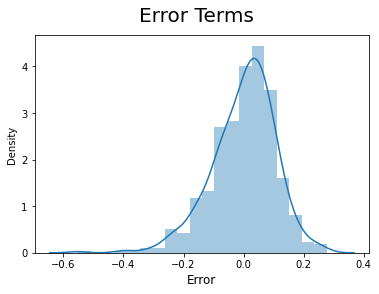

In [54]:
# Plot histogram of error terms
fig=plt.figure()
sns.distplot((y_train-y_train_cnt),bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Error',fontsize=12)
plt.show()

# 7. Making Predictions Using Final Model

#### Applying scaling on the test sets

In [55]:
#Apply scaler to all continuous variables
cont_vars = ['temp','atemp','hum','windspeed','cnt']
test_data[cont_vars]=scaler.transform(test_data[cont_vars])

test_data.describe()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mo,sa,su,th,tu,wed,light_rain,mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [56]:
y_test = test_data.pop('cnt')
X_test = test_data

# Adding constant
X_test_m = sm.add_constant(X_test)

# Creating test df by dropping variables
X_test_m = X_test_m.drop(["temp", "atemp", "hum", "spring", "jul", "jun", "mar", "may", "oct", "mo", "su", "th", "tu", "wed"], axis=1)

In [57]:
# Making Predictions
y_pred_m = tsm.predict(X_test_m)

# 8. Model Evaluation

In [58]:
from sklearn.metrics import r2_score
# Evaluating r2 for test set
r2_score(y_true=y_test, y_pred=y_pred_m)

0.72801378249401

the r-square for test set is 0.73 and for training it is 0.77, difference between them is in acceptable range

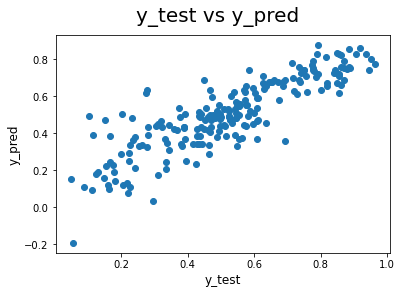

In [59]:
# Plotting y_test and y_pred
fig=plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
plt.show()

So we can see that the equation of best fitted line is:
    
cnt = 0.4725 + 0.2462 X yr + 0.0541 X workingday - 0.2370 X windspeed + 0.0436 X summer + 0.0862 X winter + 0.0997 X aug - 0.1696 X dec - 0.2075 X feb - 0.2782 X jan - 0.1170 X nov + 0.1163 X sept + 0.0587 X sa - 0.3149 X light_rain - 0.0951 X mist